In [2]:
#Modelin seçilmesi ve doğruluğununun kontrol edilmesi

#### Yanlış olan yöntem 

In [4]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [5]:
iris = load_iris()
X = iris.data
y= iris.target

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [7]:
model.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [8]:
y_model = model.predict(X)

In [9]:
accuracy_score(y_model,y)

1.0

In [10]:
# Görüldüğü üzere modelimiz %100 doğru tahminlerde bulunuyor. 
# Bu hatalı bir yöntem çünkü modeli eğittiğimiz veri ile modeli test ediyoruz.

#### Doğru yöntem

In [12]:
from sklearn.model_selection import train_test_split
#verimizin %50 sini ayırarak bir deneme yapalım 
X1, X2, y1, y2 = train_test_split(X,y,random_state=0,train_size=0.5)

In [13]:
model.fit(X1,y1)
y2_model = model.predict(X2)

In [14]:
accuracy_score(y2_model,y2)

0.9066666666666666

In [15]:
# Görüldüğü üzere doğruluk %100 den %90 olan daha makul seviyelere geriledi.
# genellikle kullanılan oran %80 eğitim %20 test şekildedir.

#### Cross Validation

In [17]:
# Veriye parçalar bölerek modeli eğitmek ve eğitilen modellerin doğruluk yüzdelerinin ortalamasını alınması
#

In [18]:
y1_model = model.fit(X2,y2).predict(X1)
y2_model = model.fit(X1,y1).predict(X2)
accuracy_score(y1_model,y1)

0.96

In [19]:
accuracy_score(y2_model,y2)

0.9066666666666666

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=3)

array([0.98, 0.94, 0.96])

In [21]:
# Model seçimi ve hiperparametreler

In [22]:
#Bias ve Variance dengesi 
# Bias Modelin verideki gerçek ilişkileri ne kadar iyi yakalayabildiğini gösterir.
# Variance Modelin eğitim verisine ne kadar hassas olduğunu ifade eder.

# Yüksek bias modelin basit ve esnekliğininin az olduğunu söyler az öğrennme.
# Karmaşık veri yapısını yakalayamaz

# Yüksek variance model eğiğitim verisine hassastır aşırı öğrenme sorununa yol açar.
# Yeni verilerde iyi performans göstermez.

#Denge 

# Düşük Bias ve Yüksek Varyans: Model karmaşık ve esnek hale gelir, bu aşırı öğrenmeye nedern olabilir.
# Yüksek Bias ve Düşük Varyans: Model fazla basit kalır, bu az öğrenmeye neden olur.


In [23]:
# Regresyon ve Pipline
# Regresyon : Verilerin girdiler ve sonuç arasında matamatiksel ilişki kurmak ve
# bu ilişkiyi kullanarak girilen yeni veriler hakkında bir sonuça varmak 

# Lineer regresyon    : y = ax + b
# Polinomal regresyon : y=a0 ​+ a1​x +a2​x^2 +⋯+an​x^n

# Pipleine : Veriyi ön işleme model eğitimi adımlarını sırayla ve 
# otomatik olarak gerçekleştiren akış.

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [25]:
# Veri oluşturma

In [26]:
import numpy as np

def make_data(N,err=1.0,rseed=1):
    rng= np.random.RandomState(rseed)
    X = rng.rand(N,1)**2
    y = 10 - 1.0 / (X.ravel()+0.1)
    if err > 0 :
        y += err*rng.randn(N)
    return X,y

X , y = make_data(40)

In [27]:
# Rastgele veriler ürettik şimdi bu ürettiğimiz verilere uygun polinomlar oluşturacağız.

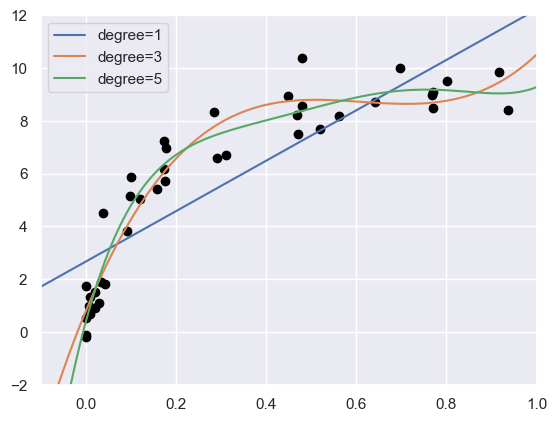

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [56]:
#Şimdi sklearn kütüphenesinde bulunan validation_curve kullanarak validation(doğruluk)
#eğrisini çizdireceğiz


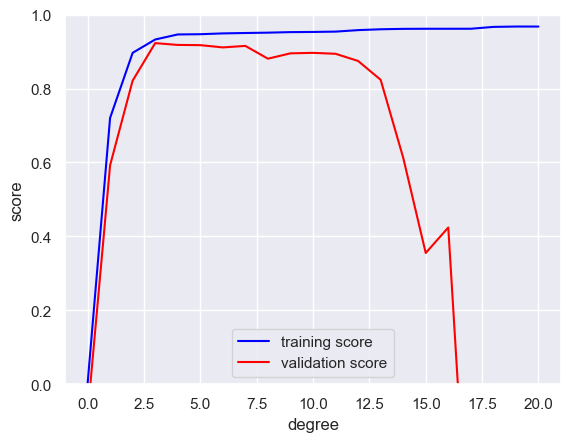

In [77]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [ ]:
# Grafik bize uygun derece olarak 3 ü gösteriyor. 

#Burada anlatılmak istenen şey, doğrulama eğrisine bakarak bias (hata payı) ve variance (değişkenlik) arasındaki 
#en iyi dengeyi sağlayan modelin bulunmasıdır. 
#Doğrulama eğrisi, model karmaşıklığı arttıkça bias ve variance arasında nasıl bir ilişki olduğunu gösterir.

#Bu durumda, üçüncü dereceden bir polinom ile oluşturulan modelin bias-variance dengesi
#açısından en uygun sonuçları verdiği gözlemlenmiş. 
#Üçüncü dereceden polinom, yeterince karmaşık olup veriye uyum sağlar,
#ancak çok karmaşık olmadığı için doğrulama verisinde de başarılıdır.
#Yani, bu model hem doğrulama hem de eğitim verisinde yüksek başarı elde ediyor.

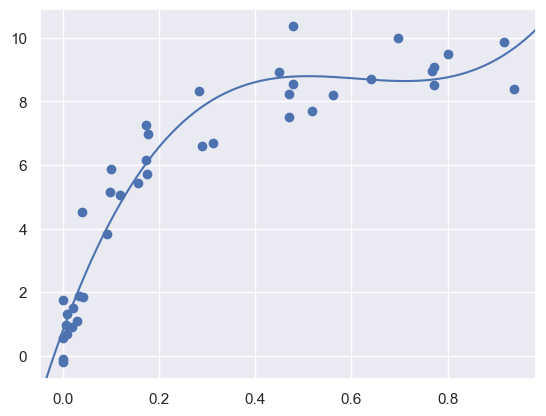

In [95]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);